# Pinkbike Downhill Fantasy League Analysis
## Setup
#### Import Libraries

If you do not have these libraries available, you should install them using `pip`

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

Finally found UCI online riders list

http://uci.ch/mountain-bike/teams/

Config

In [2]:
event = 'dh'
race = 3
gender = 'm'
topX = 20
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = True
dpi = 300

In [3]:
from config import races

racename = races[race]['name']
raceName = races[race]['title']
chart_title_prefix = raceName + ( ', Men' if gender == 'm' else ', Women' )

directory = event + str(race) + '_' + racename
file_prefix = event + str(race) + '_' + racename + '_' + gender
file_prefix = os.path.join( directory, file_prefix )

In [4]:
df = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )
dl = pd.read_csv( 'pinkbike_fantasy_costs_' + gender + '.csv' )

dfl = df.merge( dl, left_on='uci', right_on='uci', how='inner' )

In [5]:
dlen = len( df['status'].dropna() )
if topX > dlen:
    topX = dlen

In [6]:
dfl.head()

,bib,id,name_x,q_rank,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed,q_speed,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,name_y,cost
0,3,1003,PIERRON Amaury,3,47.141,83.873,122.846,165.982,196.528,3,156,Finished,10008827283,30.0,200.0,1.0,45.256,80.744,118.416,160.917,190.991,60.0,3.0,Finished,230.0,-5.537,11.0,1.123,0.000,10.0,0.908,0.000,36.732,6.0,0.593,0.000,7.0,0.996,0.000,38.973,7.0,0.500,0.000,4.0,0.931,0.000,43.136,2.0,0.383,0.000,3.0,0.638,0.000,30.546,2.0,0.106,0.000,1.0,0.000,0.000,2.0,0.278,0.000,35.488,5.0,0.547,0.000,3.0,0.059,0.000,37.672,3.0,0.461,0.000,1.0,0.000,0.000,42.501,2.0,0.043,0.000,1.0,0.000,0.000,30.074,2.0,0.046,0.000,57.643,57.157,16.011944,0.633056,10.0,5.0,1996-03-04T00:00:00,ME,PIERRON,Amaury,1197024565271555,FRA,NaN,PIERRON Amaury,0,3,PIERRON A,3,50460000,FRA19960304,6,10008827283,CVN,1590,COMMENCAL / VALLNORD,3,22,Amaury Pierron,250000
1,1,1001,GWIN Aaron,13,48.361,85.469,124.547,169.081,200.424,1,158,Finished,10006516663,12.0,160.0,2.0,45.525,80.466,118.357,161.112,191.499,52.0,11.0,Finished,172.0,-8.925,41.0,2.343,1.220,22.0,2.504,1.596,37.108,16.0,0.969,0.376,12.0,2.697,1.701,39.078,8.0,0.605,0.105,13.0,4.030,3.099,44.534,20.0,1.781,1.398,13.0,4.534,3.896,31.343,20.0,0.903,0.797,3.0,0.269,0.269,1.0,0.000,-0.278,34.941,1.0,0.000,-0.547,1.0,0.000,-0.059,37.891,5.0,0.680,0.219,2.0,0.195,0.195,42.755,4.0,0.297,0.254,2.0,0.508,0.508,30.387,9.0,0.359,0.313,58.566,57.715,16.268333,0.376667,3.0,4.0,1987-12-24T00:00:00,ME,GWIN,Aaron,1197024565271553,USA,WCL,GWIN Aaron,0,1,GWIN A,1,50400000,USA19871224,1,10006516663,YTM,1531,THE YT MOB,1,30,Aaron Gwin,625000
2,10,1010,GREENLAND Laurie,6,46.532,83.007,122.780,166.467,197.595,10,149,Finished,10009404738,20.0,140.0,3.0,45.649,81.097,119.363,161.821,192.146,57.0,6.0,Finished,160.0,-5.449,5.0,0.514,-0.609,2.0,0.042,-0.866,36.475,2.0,0.336,-0.257,6.0,0.930,-0.066,39.773,30.0,1.300,0.800,5.0,1.416,0.485,43.687,5.0,0.934,0.551,6.0,1.705,1.067,31.128,11.0,0.688,0.582,6.0,0.393,0.393,3.0,0.631,0.353,35.448,4.0,0.507,-0.040,5.0,1.006,0.947,38.266,12.0,1.055,0.594,3.0,0.904,0.904,42.458,1.0,0.000,-0.043,3.0,1.155,1.155,30.325,8.0,0.297,0.251,57.759,55.398,16.044167,0.600833,9.0,26.0,1997-02-18T00:00:00,ME,GREENLAND,Laurie,1197024565271562,GBR,NaN,GREENLAND Laurie,0,10,GREENLAND L,10,50670000,GBR19970218,12,10009404738,MSM,1009,MS MONDRAKER TEAM,10,21,Laurie Greenland,325000
3,4,1004,BROSNAN Troy,7,47.002,83.781,122.684,166.936,197.748,4,155,Finished,10007307417,18.0,125.0,4.0,45.808,81.241,119.218,161.996,192.305,56.0,

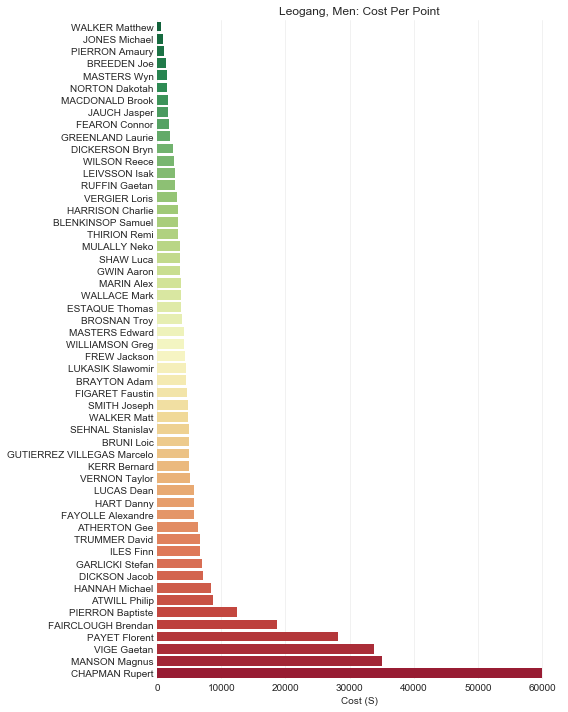

In [7]:
cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
data = dfl.sort_values( 'dpp', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 5))
plot = sns.barplot( data['dpp'][:cnt], data['name_x'][:cnt], palette='RdYlGn_r' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_cost_per_point.png', dpi=dpi )

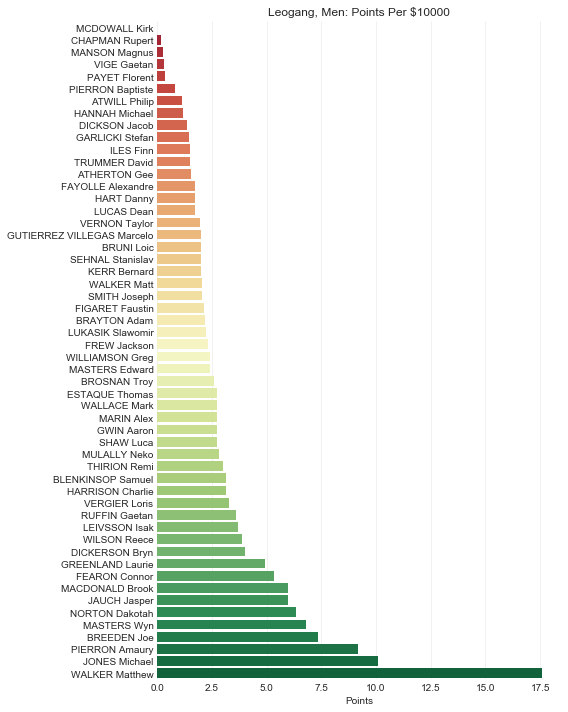

In [8]:
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)
data = dfl[:cnt].sort_values( 'ppd', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 4))
plot = sns.barplot( data['ppd'], data['name_x'], palette='RdYlGn' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Points Per $10000', xlabel='Points', ylabel='' )
# plot.invert_xaxis()

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_points_per_dollar.png', dpi=dpi )

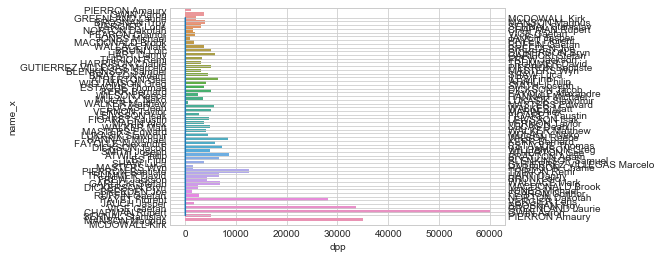

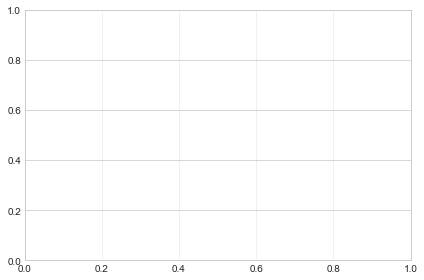

In [9]:
# Attempt to combine

cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)

fig, ax = plt.subplots()

# plt.figure(figsize=(8,10 if 'm' == gender else 5))
sns.barplot( x='dpp', y='name_x', data=dfl[:cnt], ax=ax ) #, palette=colors )

ax2 = ax.twinx()

# plot1 = sns.barplot( dfl['ppd'][:cnt], dfl['name_x'][:cnt], ax=ax2 ) #, palette=colors )
ax2.plot( dfl['ppd'][:cnt], dfl['name_x'][:cnt] ) #, palette=colors )
# plot1.invert_xaxis()

plt.show()

sns.despine()
# plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
# plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

In [10]:
dfx = df[['name', 'points', 'rank', 'WorldCupRank', 'UciRank', 'start_rev']].copy().dropna()
dfx['UciPerf'] = round( dfx['UciRank'] / dfx['points'], 2 )
dfx['UciRankPerf'] = round( dfx['UciRank'] / dfx['rank'], 2 )
dfx['RacePerf'] = dfx['start_rev'] / dfx['points']
dfx['RaceRankPerf'] = dfx['start_rev'] / dfx['rank']
dfx['WcRankPerf'] = dfx['WorldCupRank'] / dfx['rank']
# dfx['dpp'] = round( dfx['cost']/dfx['points'], 2 )
# dfx['ppd'] = round( dfx['points'] / (dfx['cost']/10000), 2 )

In [11]:
dfx.sort_values( 'UciRankPerf', ascending=False ).head()

,name,points,rank,WorldCupRank,UciRank,start_rev,UciPerf,UciRankPerf,RacePerf,RaceRankPerf,WcRankPerf
19,ESTAQUE Thomas,41.0,20.0,60,421,35.0,10.27,21.05,0.853659,1.750000,3.000000
7,JONES Michael,101.0,8.0,46,93,19.0,0.92,11.62,0.188119,2.375000,5.750000
12,THIRION Remi,75.0,13.0,14,83,9.0,1.11,6.38,0.120000,0.692308,1.076923
0,PIERRON Amaury,230.0,1.0,3,6,3.0,0.03,6.00,0.013043,3.000000,3.000000
6,FEARON Connor,107.0,7.0,15,33,8.0,0.31,4.71,0.074766,1.142857,2.142857


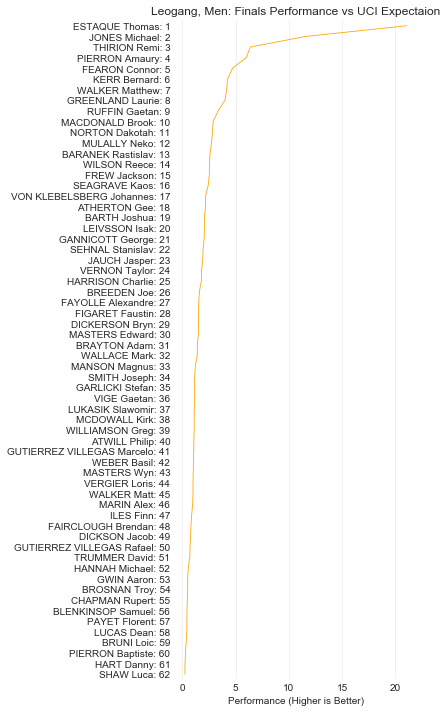

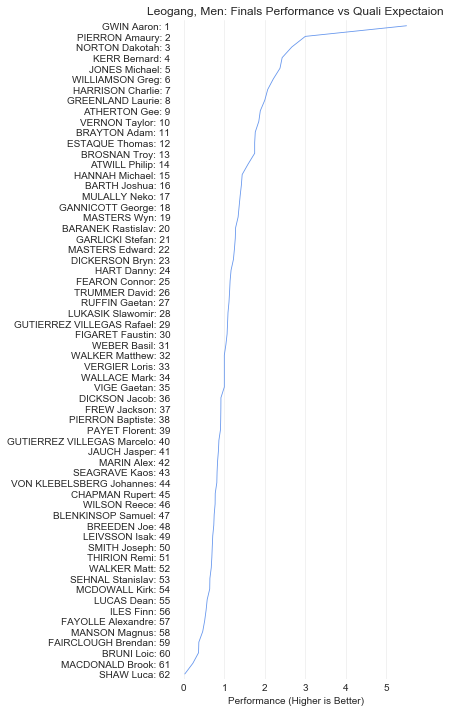

In [77]:
labs = [ 'Rank vs UCI Ranking', 'Rank vs Qualifying' ]
tits = [ 'UCI', 'Quali' ]
for idx, col in enumerate( [ 'UciRankPerf', 'RaceRankPerf' ] ):
    data = dfx.sort_values( col, ascending=False ).reset_index( drop=True )

    # ylabels = [ str(i+1) + ' ' + name + ' (' + str(data['UciRank'][i]) + '/' + str(data['rank'][i])[:-2] + ')' for i, name in enumerate( data['name'] ) ]
    ylabels = [ name + ': ' + str(i+1) for i, name in enumerate( data['name'] ) ]
    cols = [ 'orange', 'cornflowerblue', 'green', 'red' ]

    plt.figure(figsize=(6,10 if 'm' == gender else 4))
    plot = sns.pointplot( data[col], data['name'], scale=0.3, color=cols[idx], markers='' )

#     leg1 = mlines.Line2D( [], [], color=cols[0], marker='', markersize=10, label=labs[idx], linestyle='-' )
#     leg2 = mlines.Line2D( [], [], color=cols[1], marker='', markersize=10, label=labs[idx], linestyle='-' )
#     plt.legend( handles=[leg1, leg2] )

    sns.despine()
    plot.set_frame_on(False)
    plt.grid( True, which='major', axis='x', color='#EEEEEE' )
    plot.set( title=chart_title_prefix + ': Finals Performance vs ' + tits[idx] + ' Expectaion', xlabel='Performance (Higher is Better)', ylabel='' )
    plot.set_yticklabels( ylabels )
    # plot.set(xscale="log")

    plt.tight_layout()

    if image_gen:
        plt.savefig( file_prefix + '_' + tits[idx].lower() + '_finals_performance.png', dpi=dpi )

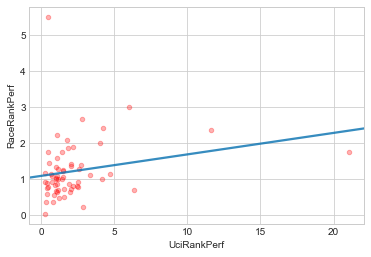

In [69]:
plot1 = sns.regplot( data['UciRankPerf'], data['RaceRankPerf'], marker='o', ci=None, line_kws={'color': '#0570b0', "alpha": 0.8}, scatter_kws={"s": 20, "alpha": 0.3, "color": "red"} ) #, fit_reg=False
# plot2 = sns.regplot( data['start_rev'], data['rank'], marker='*' )
# plt.ylim( 0, 61 )
# plot1.invert_xaxis()
# plot1.invert_yaxis()
# plot1.set(yscale="log")


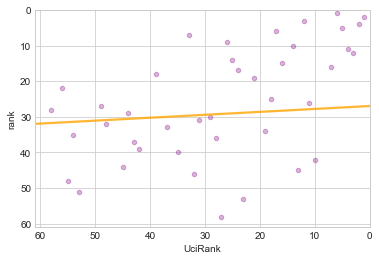

In [74]:
plot1 = sns.regplot( data['UciRank'], data['rank'], marker='o', ci=None, line_kws={'color': 'orange', "alpha": 0.8}, scatter_kws={"s": 20, "alpha": 0.3, "color": "purple"} ) #, fit_reg=False
# plot2 = sns.regplot( data['start_rev'], data['rank'], marker='*' )
plt.ylim( 0, 61 )
plt.xlim( 0, 61 )
plot1.invert_xaxis()
plot1.invert_yaxis()
